# Comprehensive data exploration with Python (by Pedro Marcelino)

<https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python>


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
df_train = pd.read_csv('./input/train.csv')
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Understand the data

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an **Excel** spreadsheet with the following columns:

1. **Variable**
  Variable name.

2. **Type**
  Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories.

3. **Segment**
  Identification of the variables' segment. We can define three possible segments: building, space or location.
  When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual').
  When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF').
  Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

4. **Expectation**
  Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values.

5. **Conclusion**
  Our conclusions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in 'Expectation'.

6. **Comments**
  Any general comments that occured to us.

Lastly, make scattered plots for variable X against target (SalePrice) to validate our expectations.


In [27]:
# Analyse the target
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

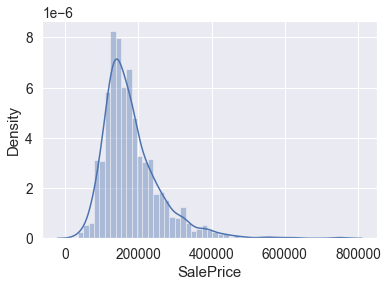

In [28]:
#histogram
sns.distplot(df_train['SalePrice'])

In [29]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Skewness and Kurtosis

## Skewness

- +ve: more data is larger than the mean (skew to right)
- -ve: more data is smaller than the mean (skew to left)

## Kurtosis

A normal distribution has Kurtosis of 0

- +ve: data is more concentrated to the center (a high mountain)
- -ve: data is more spread-out from the center (a mushroom)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


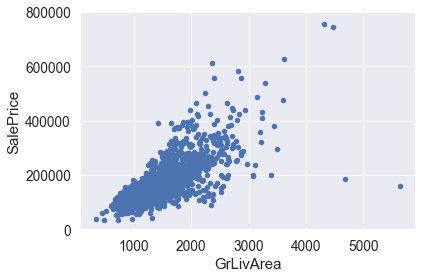

In [30]:
# Let's dive into Relationship with numerical variables

# SalePrice against GrLivArea (or anything you like, change the 'var')
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.show()

> A linear relatioship between GrLivArea and SalePrice

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


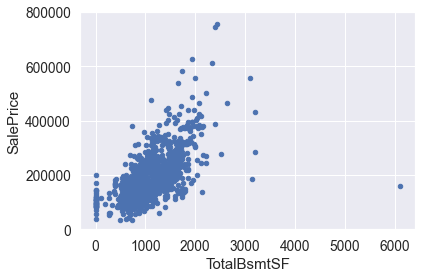

In [31]:
# SalePrice against TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

> A strong linear (exponential?) relationship, but sometimes no effect on SalePrice at all (when x=0)

(-0.5, 9.5, 0.0, 800000.0)

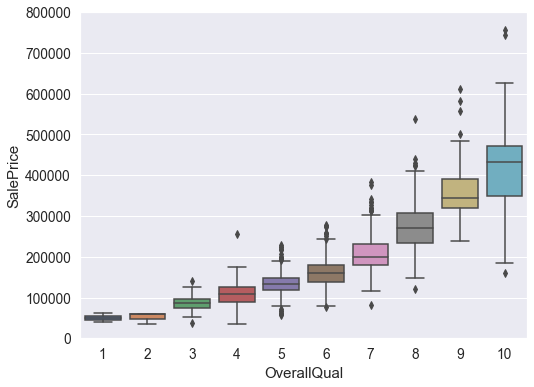

In [32]:
# box plot OverallQual/SalePrice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6)) # config subplot size
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

# We could also make a scatter plot for fun
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 111.5, 0.0, 800000.0)

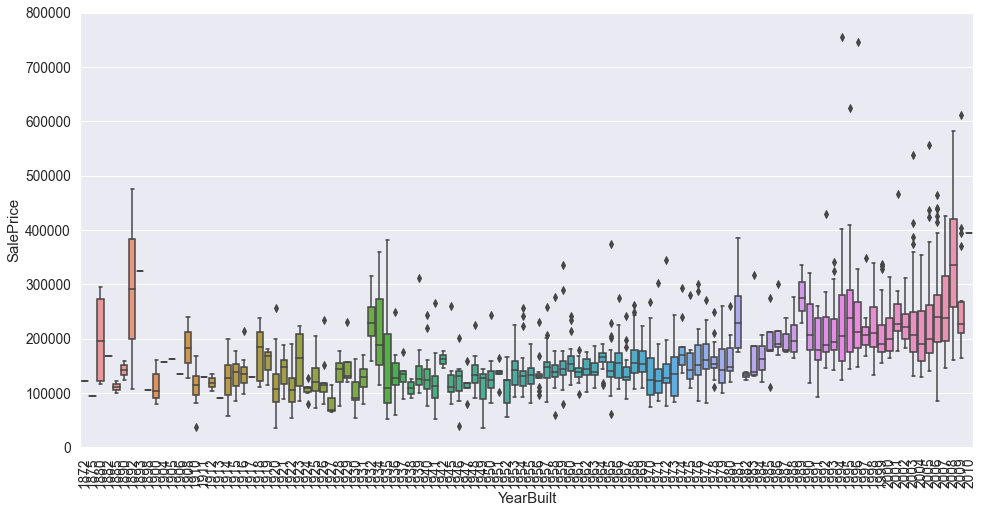

In [33]:
# box plot YearBuilt/SalePrice
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

> Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

# Now is time to analyse the data in a more subjective way

- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables (move like Jagger style).

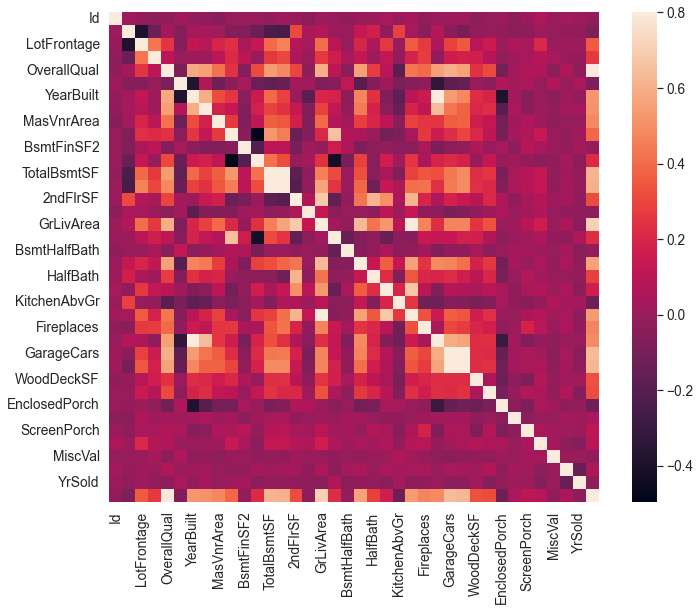

In [34]:
# Correlation matrix (heatmap style)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12,9)) # config plot size
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

> Correlations between every pair of variables. Closer to white == higher correlation

# Quote:

> At first sight, there are two white colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.


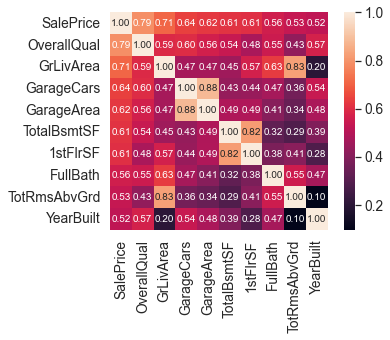

In [35]:
# 'SalePrice' correlation matrix (zoomed heatmap style)

k = 10 # no. of variables for the heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # get names of top k features with highest correlation to SalePrice (1)
cm = np.corrcoef(df_train[cols].values.T) # .T means "Transpose" of the matrix (2)

sns.set_theme(font_scale=1.25)
hm = sns.heatmap(
  cm,
  cbar=True,
  annot=True,
  square=True,
  fmt='.2f',
  annot_kws={'size': 10},
  yticklabels=cols.values,
  xticklabels=cols.values
)
plt.show()

# Detailed Explanation for above (1) and (2)

## 1. Getting k features which have the largest correlation with SalesPrice

1. "corrmat" is the correlation matrix from the last cell, indicating the correlation of every pair of variables.
   It is a NxN matrix, where N is the number of features.

2. "corrmat.nlargest(k, 'SalePrice')" finds out k largest variables which have the highest correlation with 'SalePrice'.
   It is a kxN matrix.

3. Lastly, "corrmat.nlargest(k, 'SalePrice')['SalesPrice'].index" extracts the 'SalePrice' column only and return the feature names (indexes).
   It is a kx1 vector.

## 2. Generate a correlation matrix with the k features

1. "df_train[cols].values" gets the matrix values. It is a list of rows (kxk 2D array).

2. Use ".T" transpose the matrix and get a list of columns (kxk 2D array).

3. "np.corrcoef" accepts the list of columns and compile a kxk coefficient matrix.


# What can we get from this zoomed heatmap?

Quote again

> According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:
> 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!
'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').
'FullBath'?? Really?
'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?
Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.
Let's proceed to the scatter plots.

# Scattered plots (final showcase of variable relationships)

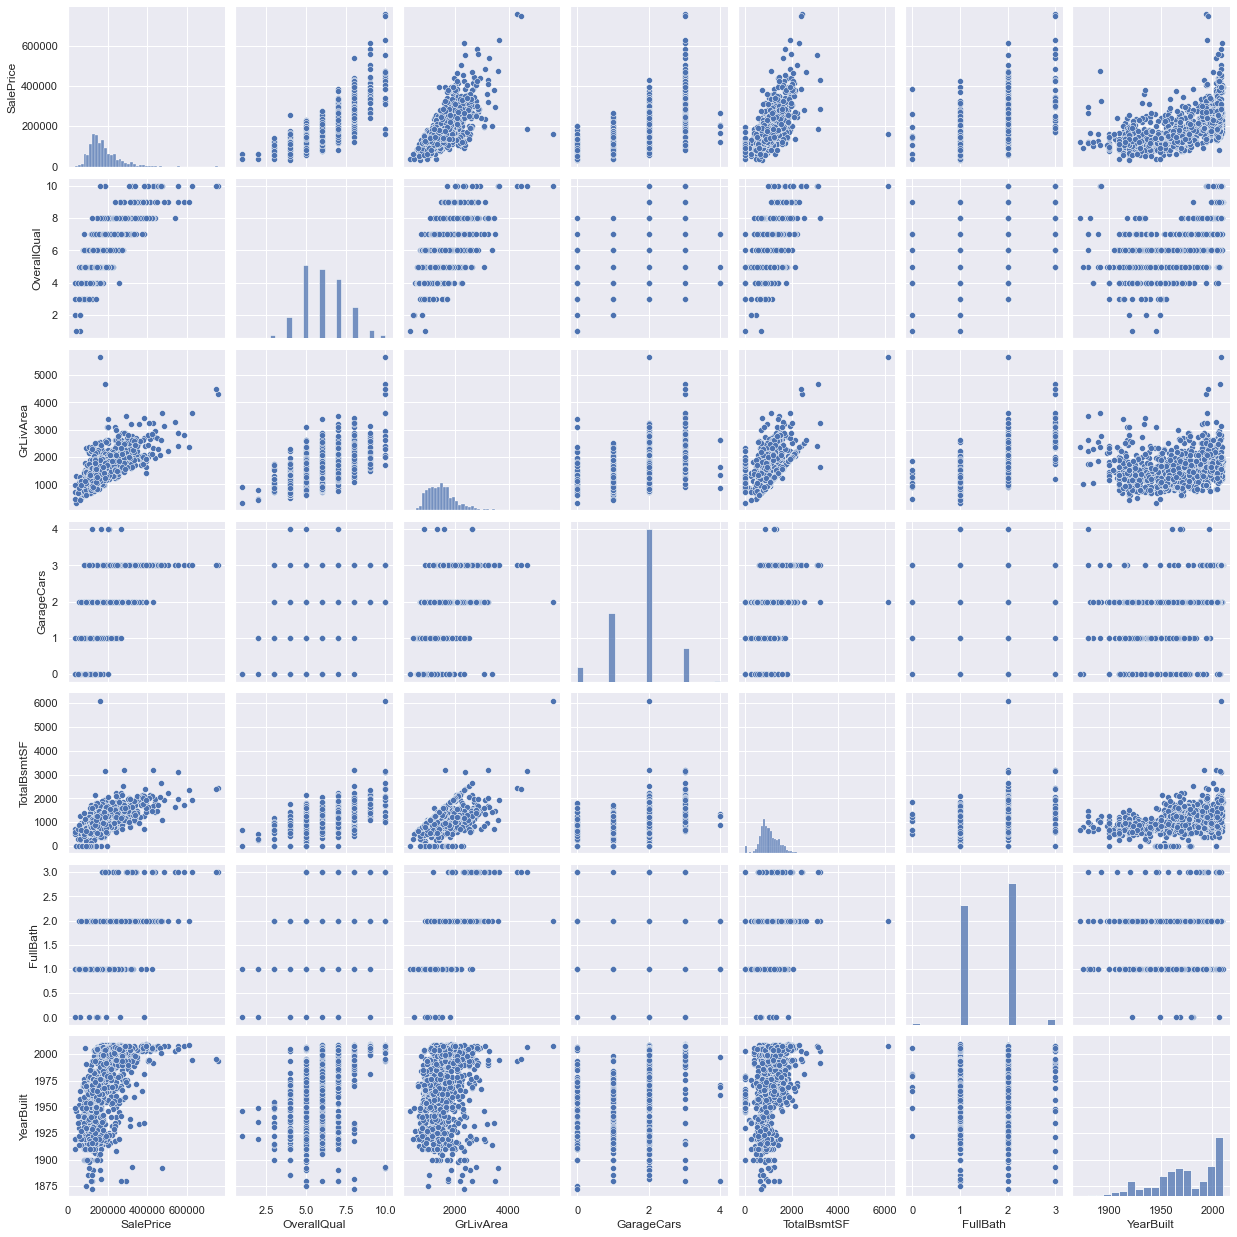

In [36]:
sns.set_theme()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()

# Dealing with Missing Data

Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

In [37]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values( # df_train.isnull() is used as dummy array in the second half
    ascending=False
)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


# Delete useless data (more than 15% NA)

Quote:
> We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.
> In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 𝑖𝑛5  problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables.
> Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.
> Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.
> In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [38]:
# Dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1].index), 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

# Out liars

They can provide useful info sometimes. Below is some more analysis

## Univariate analysis